# Ejercicio Exploratorio de datos

### Limpieza de datos

In [2]:
import pandas as pd
import numpy as np
#import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "resources\olist_sellers_dataset.csv"
df_sellers= pd.read_csv(file_path)


file_path = "resources\olist_products_dataset.csv"
df_products= pd.read_csv(file_path)


file_path = "resources\olist_product_category_name_translation.csv"
df_categories= pd.read_csv(file_path)


file_path = "resources\olist_orders_dataset.csv"
df_orders= pd.read_csv(file_path)


file_path = "resources\olist_order_reviews_dataset.csv"
df_reviews= pd.read_csv(file_path)


file_path = "resources\olist_order_payments_dataset.csv"
df_payments= pd.read_csv(file_path)


file_path = "resources\olist_order_items_dataset.csv"
df_order_items= pd.read_csv(file_path)


file_path = "resources\olist_customers_dataset.csv"
df_customer= pd.read_csv(file_path)


Customer

In [4]:
df_customer.drop_duplicates()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [5]:
df_customer.columns = ['id_customer_order','id_user' ,'zip_code_prefix', 'city', 'state']

#id_customer se genera al realizar una order, mientras que id_unique identifica al usuario

Geolocation

In [6]:
df_sellers.columns=['id_seller', 'zip_code_prefix','city', 'state']

columns = ['zip_code_prefix','city', 'state']

seller_location = df_sellers[columns]
customer_location = df_customer[columns]


df_geolocation = pd.concat([customer_location, seller_location,])

df_customer = df_customer.drop(columns=['city', 'state'])
df_sellers = df_sellers.drop(columns=['city', 'state'])

df_geolocation = df_geolocation.drop_duplicates(subset='zip_code_prefix')

df_geolocation['city'] = df_geolocation['city'].str.split(r' -|/').str[0]
df_geolocation['city'] = df_geolocation['city'].str.strip()

df_geolocation['city'] = df_geolocation['city'].str.title()


Products

In [7]:
df_categories.columns = ['category_pt', 'category_en']


df_products = df_products[['product_id', 'product_category_name', 'product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm']]
df_products.columns = ['id_product', 'category', 'weight_g', 'lengh_cm', 'heigh_cm', 'width_cm']


nueva_filas = pd.DataFrame({
    'category_pt': ['pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
    'category_en': ['pc_gamer', 'kitchenware_and_food_preparars']
})


df_categories = pd.concat([df_categories, nueva_filas], ignore_index=True)


df_products = pd.merge(
    df_products,
    df_categories[['category_pt', 'category_en']], 
    left_on='category',
    right_on='category_pt',
    how='outer'
)

df_products = df_products.drop(columns=['category'])

df_products['category_en'] = df_products['category_en'].fillna('unknow')
df_products['category_pt'] = df_products['category_pt'].fillna('unknow')

df_products['weight_g'] = df_products['weight_g'].fillna(df_products['weight_g'].mean())
df_products['lengh_cm'] = df_products['lengh_cm'].fillna(df_products['lengh_cm'].mean())
df_products['heigh_cm'] = df_products['heigh_cm'].fillna(df_products['heigh_cm'].mean())
df_products['width_cm'] = df_products['width_cm'].fillna(df_products['width_cm'].mean())


df_products


,id_product,weight_g,lengh_cm,heigh_cm,width_cm,category_pt,category_en
0,07f01b6fcacc1b187a71e5074199db2d,16400.0,63.0,66.0,56.0,agro_industria_e_comercio,agro_industry_and_commerce
1,613d093272cb8f74f25a01e430155a6a,1050.0,38.0,41.0,39.0,agro_industria_e_comercio,agro_industry_and_commerce
2,980ecbcc15fe174ec1e5757c4d75b1bf,250.0,17.0,3.0,10.0,agro_industria_e_comercio,agro_industry_and_commerce
3,ba1d7e7ee1f055d252a2faa8ea3cea9b,1900.0,45.0,15.0,40.0,agro_industria_e_comercio,agro_industry_and_commerce
4,137ace556a03792cdc43f91ec621426d,550.0,16.0,19.0,11.0,agro_industria_e_comercio,agro_industry_and_commerce
...,...,...,...,...,...,...,...
32946,b0a0c5dd78e644373b199380612c350a,1800.0,30.0,20.0,70.0,unknow,unknow
32947,10dbe0fbaa2c505123c17fdc34a63c56,800.0,30.0,10.0,23.0,unknow,unknow
32948,bd2ada37b58ae94cc838b9c0569fecd8,200.0,21.0,8.0,16.0,unknow,unknow
32949,fa51e914046aab32764c41356b9d4ea4,1300.0,45.0,16.0,45.0,unknow,unknow


Orders

In [8]:

fechas = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

df_orders[fechas] = df_orders[fechas].apply(pd.to_datetime)
df_orders




,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


Order items

In [9]:
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])
df_order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Seller

In [10]:
df_sellers

,id_seller,zip_code_prefix
0,3442f8959a84dea7ee197c632cb2df15,13023
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195
4,51a04a8a6bdcb23deccc82b0b80742cf,12914
...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111
3091,f8201cab383e484733266d1906e2fdfa,88137
3092,74871d19219c7d518d0090283e03c137,4650
3093,e603cf3fec55f8697c9059638d6c8eb5,96080


Reviews

In [11]:
df_reviews['review_comment_title'] = df_reviews['review_comment_title'].fillna('No comment')
df_reviews['review_comment_message'] = df_reviews['review_comment_message'].fillna('No comment')

df_reviews['review_creation_date'] = pd.to_datetime(df_reviews['review_creation_date']) 
df_reviews['review_answer_timestamp'] = pd.to_datetime(df_reviews['review_answer_timestamp'])

df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No comment,No comment,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No comment,No comment,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No comment,No comment,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No comment,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No comment,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,No comment,No comment,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,No comment,No comment,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,No comment,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,No comment,No comment,2018-07-01,2018-07-02 12:59:13


Payments

In [12]:
df_payments['payment_type'] = df_payments['payment_type'].replace(
    {'boleto': 'ticket'}
)

df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,ticket,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


Exportacion

In [13]:
# df_customer.to_csv('csv definitivos/customer.csv')
# df_products.to_csv('csv definitivos/productos.csv')
# df_sellers.to_csv('csv definitivos/sellers.csv')
# df_orders.to_csv('csv definitivos/orders.csv')
# df_order_items.to_csv('csv definitivos/ordersItem.csv')
# df_reviews.to_csv('csv definitivos/reviews.csv')
# df_payments.to_csv('csv definitivos/payments.csv')
# df_geolocation.to_csv('csv definitivos/geolocation.csv')

### Métricas

1. Representa una clasificación del nº de clientes por estado (Si consideras que hay demasiados estados representa el top 5). Paso siguiente crea una tabla donde se representen los estados, las ciudades que pertenecen a esos estados y el numero de clientes en esas ciudades. Ademas de eso, la tabla y todos los graficos representados deberan de ser dinamicos respecto a la fecha  



In [14]:
customers = pd.merge( df_customer, df_geolocation, left_on='zip_code_prefix', right_on='zip_code_prefix', how = 'left' )


customers = pd.merge ( customers, df_orders[['order_id','customer_id','order_status', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']], left_on= 'id_customer_order', right_on='customer_id', how = 'left' ) 

customers = customers.drop('customer_id',axis=1)
 



customers.to_csv('streamlit/customers.csv')


#customers = customers.drop_duplicates(subset='id_user')

customers


,id_customer_order,id_user,zip_code_prefix,city,state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Sao Paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Taboao Da Serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-16 19:58:39,2017-12-05


In [15]:
topEstados = customers.groupby('state')['id_user'].nunique().sort_values(ascending=False).head(5)
topEstados

state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
Name: id_user, dtype: int64

Ciudades

In [16]:

df_ciudades = (customers.groupby(['city', 'state'])['id_user'].nunique().reset_index(name='total_clients').sort_values('total_clients', ascending=False))

totalPedidos = (customers.groupby('city')['id_customer_order'].count().reset_index(name='total_orders'))

df_ciudades = pd.merge(df_ciudades, totalPedidos, on='city', how='left')

df_ciudades['Porcentaje %'] = (
    df_ciudades['total_orders'] / df_ciudades['total_orders'].sum() * 100
).round(2)

df_ciudades['orders_x_client'] = (
    df_ciudades['total_orders'] / df_ciudades['total_clients']
).round(2)

df_ciudades.head(20)


 

,city,state,total_clients,total_orders,Porcentaje %,orders_x_client
0,Sao Paulo,SP,14984,15540,14.61,1.04
1,Rio De Janeiro,RJ,6620,6882,6.47,1.04
2,Belo Horizonte,MG,2672,2773,2.61,1.04
3,Brasilia,DF,2071,2136,2.01,1.03
4,Curitiba,PR,1465,1521,1.43,1.04
5,Campinas,SP,1398,1444,1.36,1.03
6,Porto Alegre,RS,1326,1379,1.30,1.04
7,Salvador,BA,1209,1245,1.17,1.03
8,Guarulhos,SP,1153,1189,1.12,1.03
9,Sao Bernardo Do Campo,SP,908,938,0.88,1.03


Gráficos

Gráfico top ciudades por Número de clientes

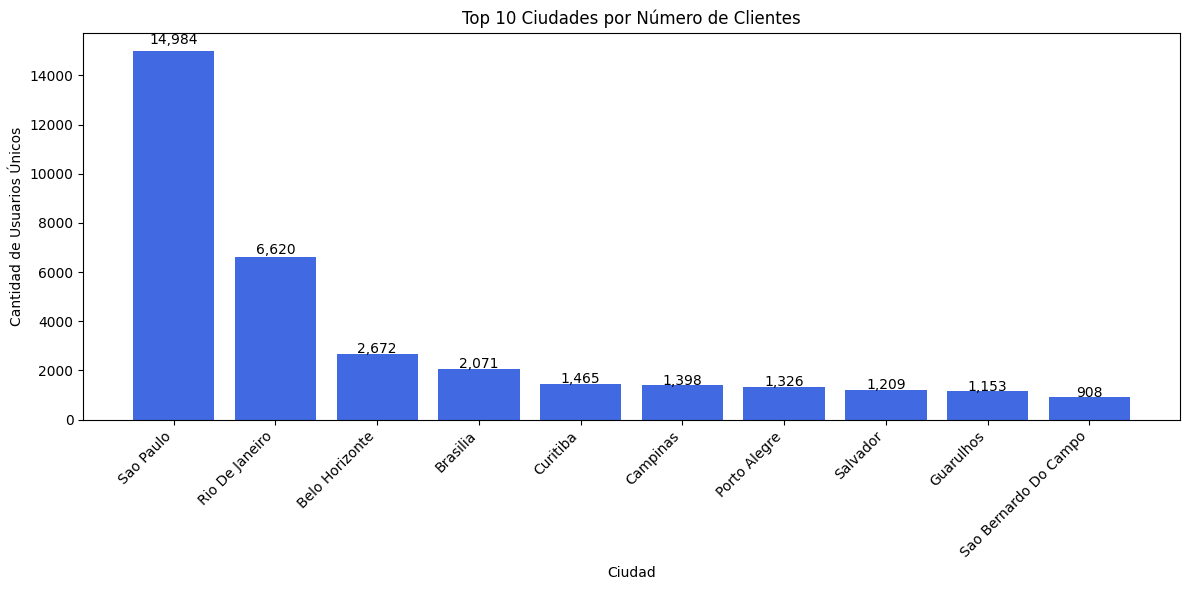

In [17]:
top_users = df_ciudades.sort_values('total_clients', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_users['city'], top_users['total_clients'], color='royalblue')

plt.title('Top 10 Ciudades por Número de Clientes')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Usuarios Únicos')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(top_users['total_clients']):
    plt.text(i, v + (v * 0.02), f"{v:,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


Gráfico top ciudades por Número de Total de Pedidios

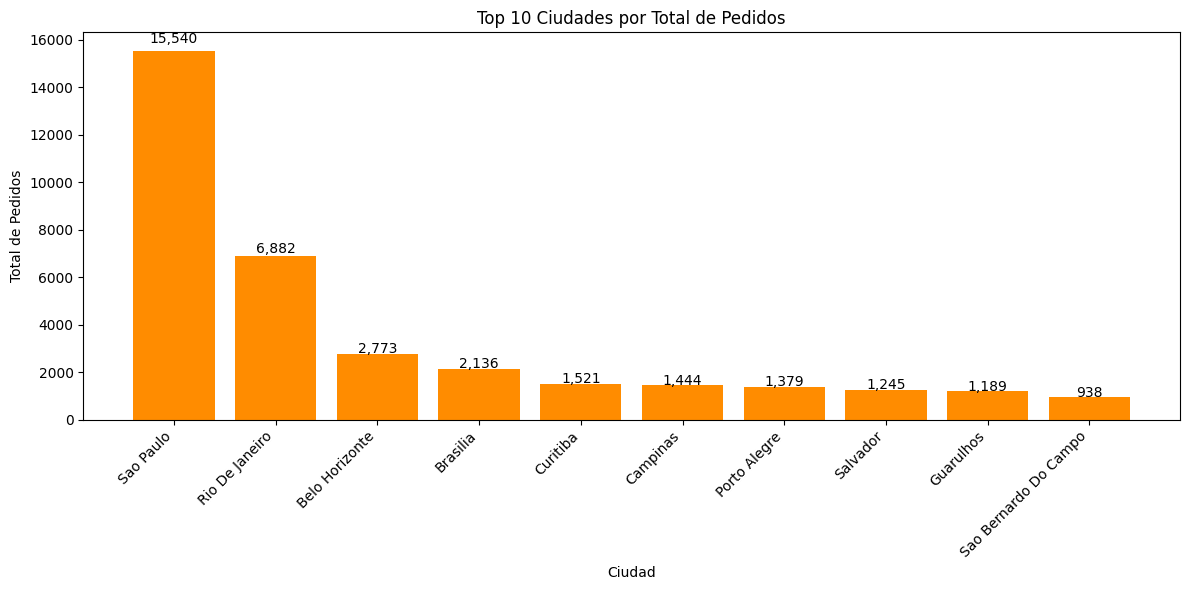

In [18]:
top_orders = df_ciudades.sort_values('total_orders', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_orders['city'], top_orders['total_orders'], color='darkorange')

plt.title('Top 10 Ciudades por Total de Pedidos')
plt.xlabel('Ciudad')
plt.ylabel('Total de Pedidos')
plt.xticks(rotation=45, ha='right')

# Mostrar unidades en cada barra
for i, v in enumerate(top_orders['total_orders']):
    plt.text(i, v + (v * 0.02), f"{v:,}", ha='center', fontsize=10)
plt.tight_layout()

plt.show()

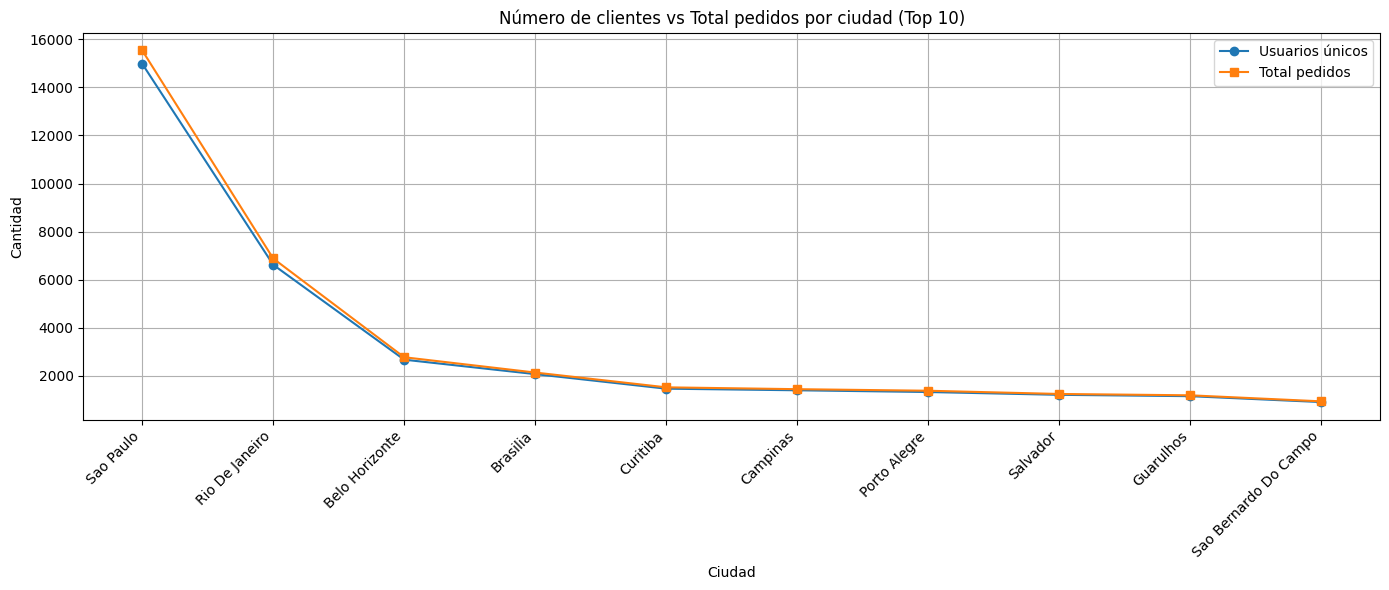

In [19]:
top_combined = df_ciudades.sort_values('total_clients', ascending=False).head(10)

plt.figure(figsize=(14, 6))

plt.plot(top_combined['city'], top_combined['total_clients'], marker='o', label='Usuarios únicos')

plt.plot(top_combined['city'], top_combined['total_orders'], marker='s', label='Total pedidos')

plt.title('Número de clientes vs Total pedidos por ciudad (Top 10)')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Gráfico top 10 ciudades por porcentaje de pedidos 

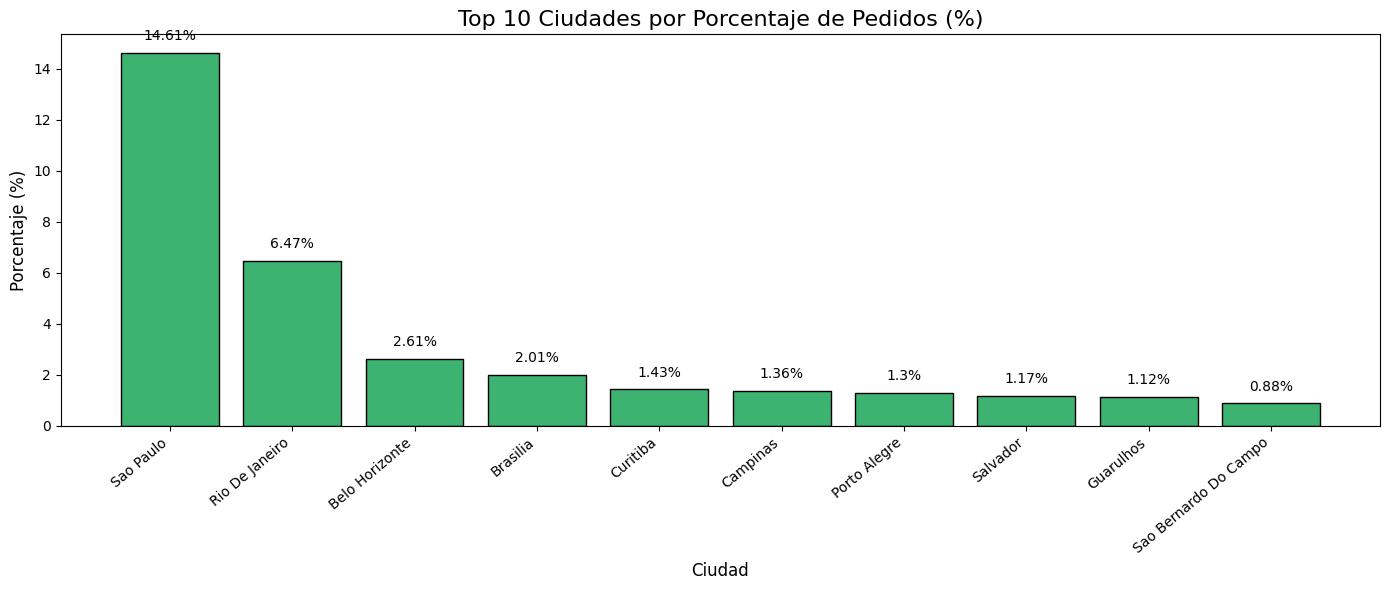

In [20]:

top_pct = df_ciudades.sort_values('Porcentaje %', ascending=False).head(10)

plt.figure(figsize=(14, 6))
plt.bar(top_pct['city'], top_pct['Porcentaje %'], color='mediumseagreen', edgecolor='black')

plt.title('Top 10 Ciudades por Porcentaje de Pedidos (%)', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=40, ha='right')

# Mostrar valores encima de las barras
for i, v in enumerate(top_pct['Porcentaje %']):
    plt.text(i, v + 0.5, f"{v}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


Gráfico Participación de pedidios por ciudad (%)

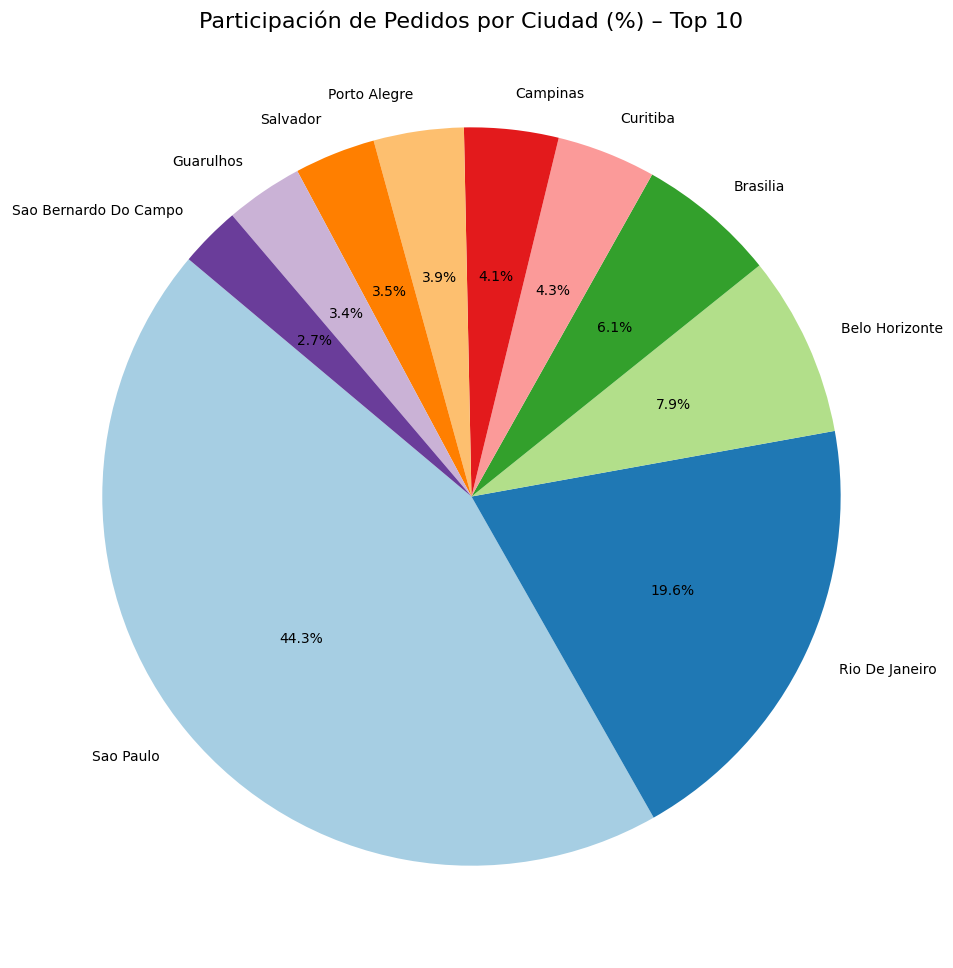

In [21]:
top_pct = df_ciudades.sort_values('Porcentaje %', ascending=False).head(10)
plt.figure(figsize=(10, 10))

plt.pie(
    top_pct['Porcentaje %'],
    labels=top_pct['city'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

plt.title('Participación de Pedidos por Ciudad (%) – Top 10', fontsize=16)
plt.tight_layout()
plt.show()

Gráfico índice relativo a la media 

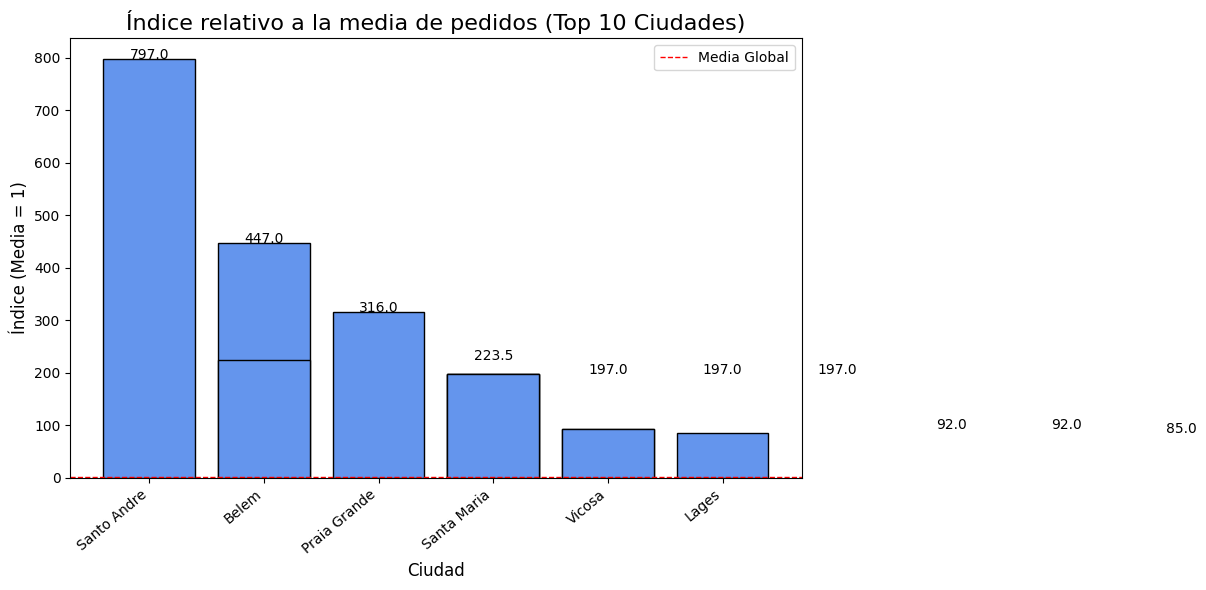

In [22]:
top_media = df_ciudades.sort_values('orders_x_client', ascending=False).head(10)

plt.figure(figsize=(14, 6))
top_media = df_ciudades.sort_values('orders_x_client', ascending=False).head(10)
plt.bar(top_media['city'], top_media['orders_x_client'], color='cornflowerblue', edgecolor='black')

plt.axhline(1, color='red', linestyle='--', linewidth=1, label='Media Global')

plt.title('Índice relativo a la media de pedidos (Top 10 Ciudades)', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Índice (Media = 1)', fontsize=12)
plt.xticks(rotation=40, ha='right')
plt.legend()

for i, v in enumerate(top_media['orders_x_client']):
    plt.text(i, v + 0.02, str(v), ha='center')

plt.tight_layout()
plt.show()

Gráfcio de pastel (%)

3. Calcula, el nº de pedidos que llegan tarde por ciudad, el porcentaje que representa respecto al total de pedidos por ciudad, junto con el tiempo medio de dias que se pasan de fecha, queremos que a la hora de representar esta falla salga ya autodiagnosticada con la razon mas probable del problema (Analiza el dataset)

In [23]:
customers_delivered = customers.query("order_status == 'delivered'").copy()

 
customers_delivered['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
customers_delivered['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])
 
customers_delivered['delay_days'] = (customers_delivered['order_delivered_customer_date'] - customers_delivered['order_estimated_delivery_date']).dt.days
customers_delivered['late'] = customers_delivered['delay_days'] > 0
 

pedidos_tarde = customers_delivered.groupby("city").agg(
    late=("late", "sum"),
    total_pedidos=("id_customer_order", "count"),
    days_late=("delay_days", lambda x: x[x > 0].mean() if any(x > 0) else 0)
).reset_index()
 
 
pedidos_tarde["late_orders_%"] = (pedidos_tarde["late"] / pedidos_tarde["total_pedidos"] * 100).round(2)


 
def diagnostico(row):
    if row['late_orders_%'] > 40 and row['days_late'] > 10:
        return "Problemas graves"
    elif row['late_orders_%'] > 25:
        return "Probable fallo del proveedor o mala preparación del pedido"
    elif row['late_orders_%'] > 15:
        return "Retrasos moderados (Posibles problemas con el repartidor)"
    else:
        return "Funcionamiento aceptable"
 
pedidos_tarde['Diagnóstico'] = pedidos_tarde.apply(diagnostico, axis=1)

pedidos_tarde = pedidos_tarde[["city", "late_orders_%", "days_late", "Diagnóstico"]]

 
pedidos_tarde

,city,late_orders_%,days_late,Diagnóstico
0,Abadia Dos Dourados,0.00,0.0,Funcionamiento aceptable
1,Abadiania,0.00,0.0,Funcionamiento aceptable
2,Abaete,16.67,14.0,Retrasos moderados (Posibles problemas con el ...
3,Abaetetuba,18.18,4.5,Retrasos moderados (Posibles problemas con el ...
4,Abaiara,0.00,0.0,Funcionamiento aceptable
...,...,...,...,...
4061,Xinguara,0.00,0.0,Funcionamiento aceptable
4062,Xique-Xique,33.33,3.0,Probable fallo del proveedor o mala preparació...
4063,Zacarias,0.00,0.0,Funcionamiento aceptable
4064,Ze Doca,0.00,0.0,Funcionamiento aceptable


Gráfico

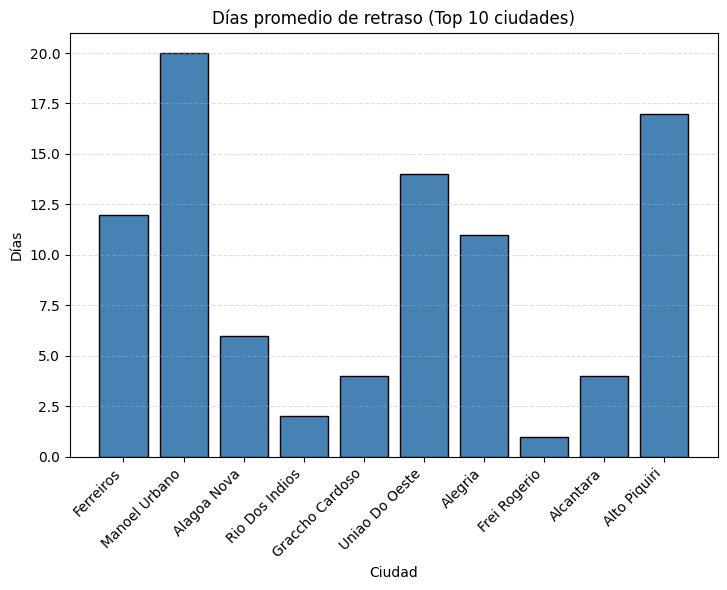

In [24]:


# Tomamos las 10 ciudades con mayor % de pedidos tarde
top10 = pedidos_tarde.sort_values('late_orders_%', ascending=False).head(10)

cities = top10['city']
late_pct = top10['late_orders_%']
days_late = top10['days_late']

plt.figure(figsize=(14,6))

#  Barras días promedio de retraso
plt.subplot(1, 2, 2)
plt.bar(cities, days_late, color='steelblue', edgecolor='black')
plt.title('Días promedio de retraso (Top 10 ciudades)')
plt.xlabel('Ciudad')
plt.ylabel('Días')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


C:\Users\fperez\AppData\Local\Temp\ipykernel_7404\2781137606.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


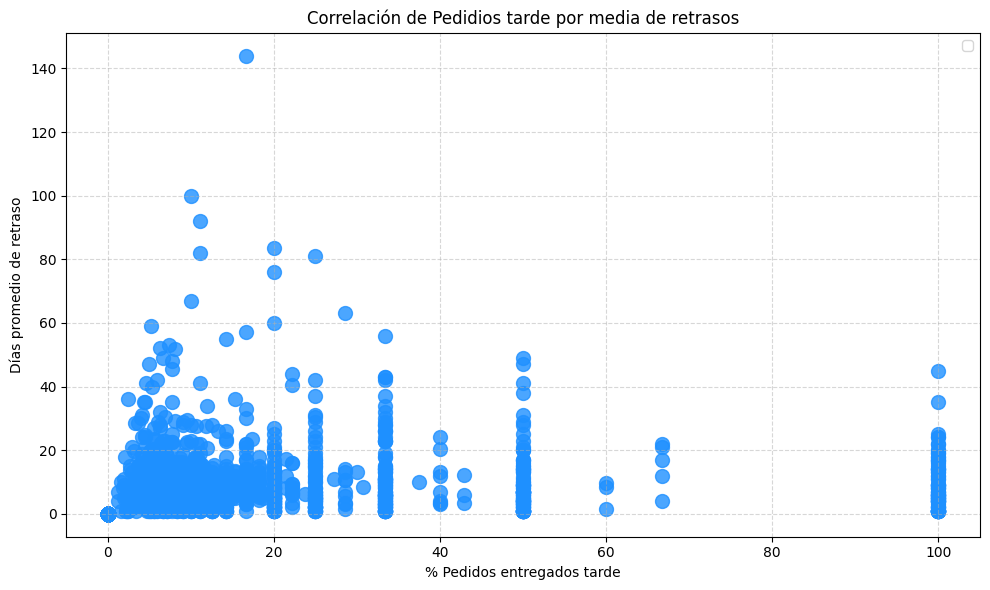

Coeficiente de correlación: 0.37


In [25]:


# Top 10 ciudades con mayor % de pedidos tarde
top10 = pedidos_tarde.sort_values('late_orders_%', ascending=False)

x = top10['late_orders_%']   # % pedidos tarde
y = top10['days_late']       # días promedio de retraso
cities = top10['city']

# Ajuste lineal
coef = np.polyfit(x, y, 1)
y_fit = np.polyval(coef, x)

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='dodgerblue', s=100, alpha=0.8)


plt.title('Correlación de Pedidios tarde por media de retrasos')
plt.xlabel('% Pedidos entregados tarde')
plt.ylabel('Días promedio de retraso')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Coeficiente de correlación
correlacion = x.corr(y)
print(f'Coeficiente de correlación: {correlacion:.2f}')


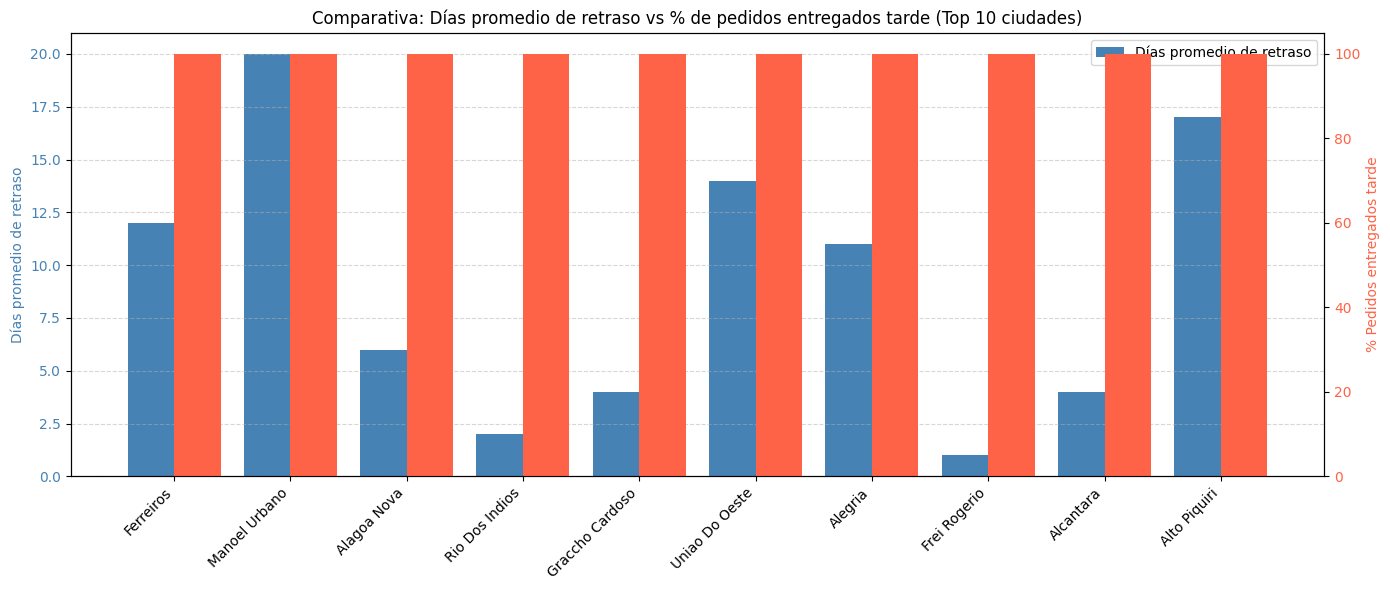

In [26]:

top10 = pedidos_tarde.sort_values('late_orders_%', ascending=False).head(10)
cities = top10['city']

x = np.arange(len(cities))
width = 0.4

fig, ax1 = plt.subplots(figsize=(14,6))

bars1 = ax1.bar(x - width/2, top10['days_late'], width, label='Días promedio de retraso', color='steelblue')
ax1.set_ylabel('Días promedio de retraso', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(x)
ax1.set_xticklabels(cities, rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, top10['late_orders_%'], width, label='% Pedidos entregados tarde', color='tomato')
ax2.set_ylabel('% Pedidos entregados tarde', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

plt.title('Comparativa: Días promedio de retraso vs % de pedidos entregados tarde (Top 10 ciudades)')

bars = bars1 + bars2
labels = [bar.get_label() for bar in [bars1, bars2]]
ax1.legend()

plt.tight_layout()
plt.show()


4. Calcula y representa el numero de reviews por estado y el score medio en cada una de ellas, como ya hemos tenido en cuenta los pedidos con retraso en la seccion anterior vamos a eliminar estos datos del apartado de score ya que se entiende que la opinion será negativa por la tardanza de llegada del producto

In [27]:
customers_review = customers_delivered[customers_delivered['late'] == False]

customers_review = pd.merge(
    df_reviews,
    customers_review[['order_id','id_customer_order', 'id_user', 'state', 'order_purchase_timestamp']],
    on='order_id',
    how='left'
)

customers_review = states_reviews = customers_review.groupby(['state']).agg(
    {
        'order_id' : 'count',
        'review_score' : 'mean'
    }
).reset_index()

customers_review.rename(columns={'order_id': 'reviews', 'review_score':'score'},inplace=True)
customers_review = customers_review.round(2)
customers_review

,state,reviews,score
0,AC,75,4.13
1,AL,378,3.83
2,AM,137,4.23
3,AP,65,4.23
4,BA,3016,3.94
5,CE,1198,3.94
6,DF,1938,4.13
7,ES,1855,4.09
8,GO,1825,4.10
9,MA,661,3.83


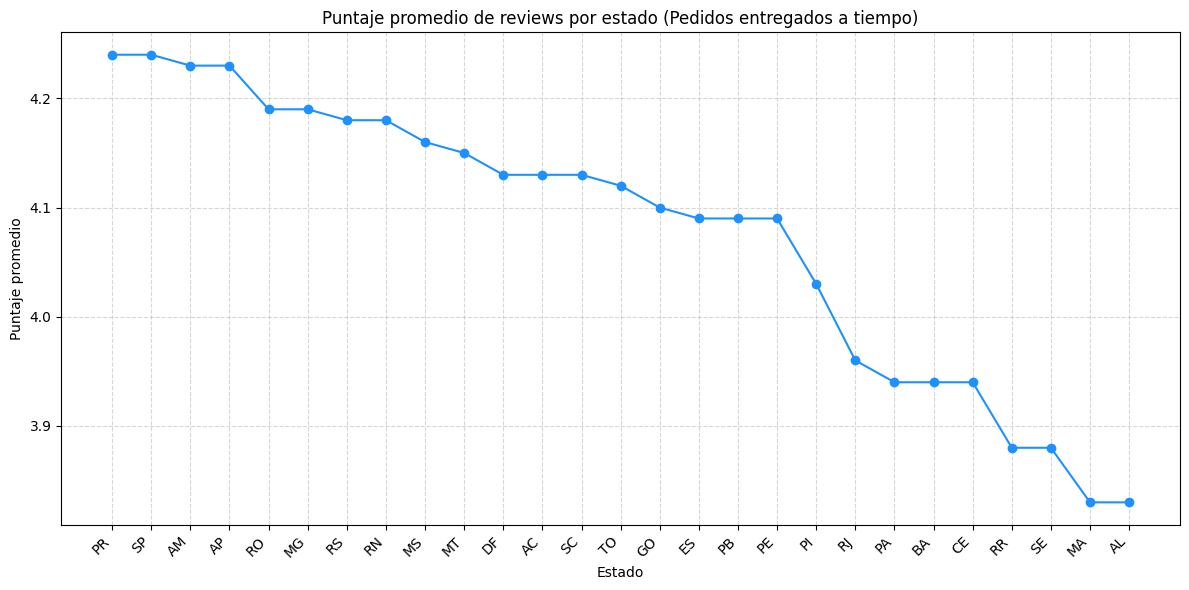

In [28]:


customers_review_sorted = customers_review.sort_values('score', ascending=False)

plt.figure(figsize=(12,6))
plt.plot(customers_review_sorted['state'], customers_review_sorted['score'], marker='o', linestyle='-', color='dodgerblue')

plt.title('Puntaje promedio de reviews por estado (Pedidos entregados a tiempo)')
plt.xlabel('Estado')
plt.ylabel('Puntaje promedio')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


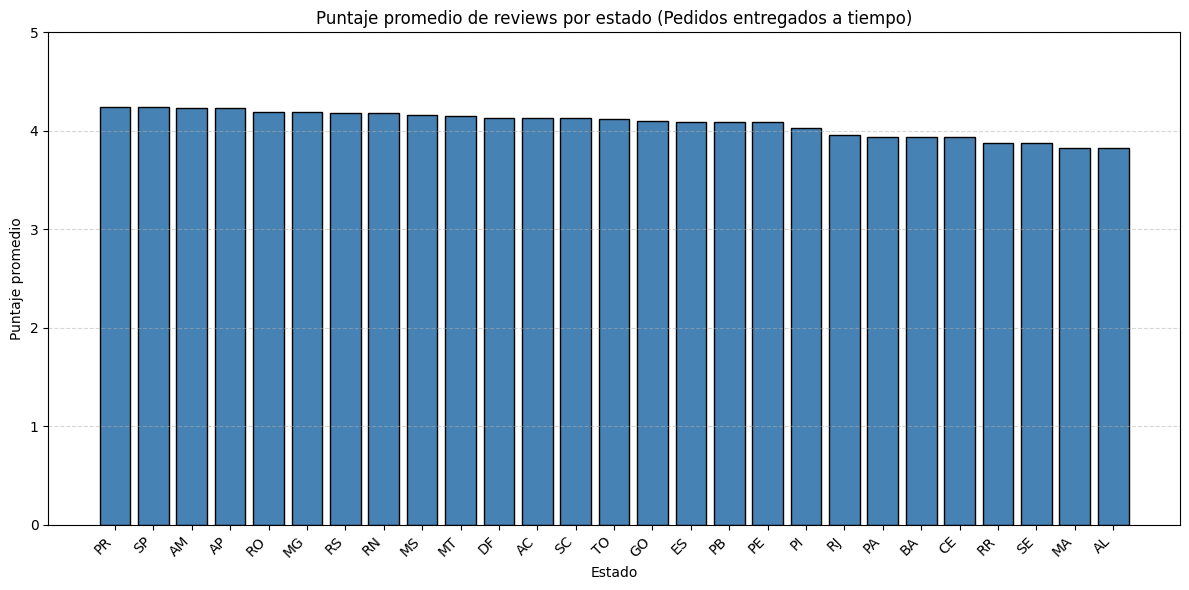

In [29]:


# Ordenamos por puntaje promedio
customers_review_sorted = customers_review.sort_values('score', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(customers_review_sorted['state'], customers_review_sorted['score'], color='steelblue', edgecolor='black')

plt.title('Puntaje promedio de reviews por estado (Pedidos entregados a tiempo)')
plt.xlabel('Estado')
plt.ylabel('Puntaje promedio')
plt.ylim(0, 5)  # Asumiendo que las reviews son de 1 a 5
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


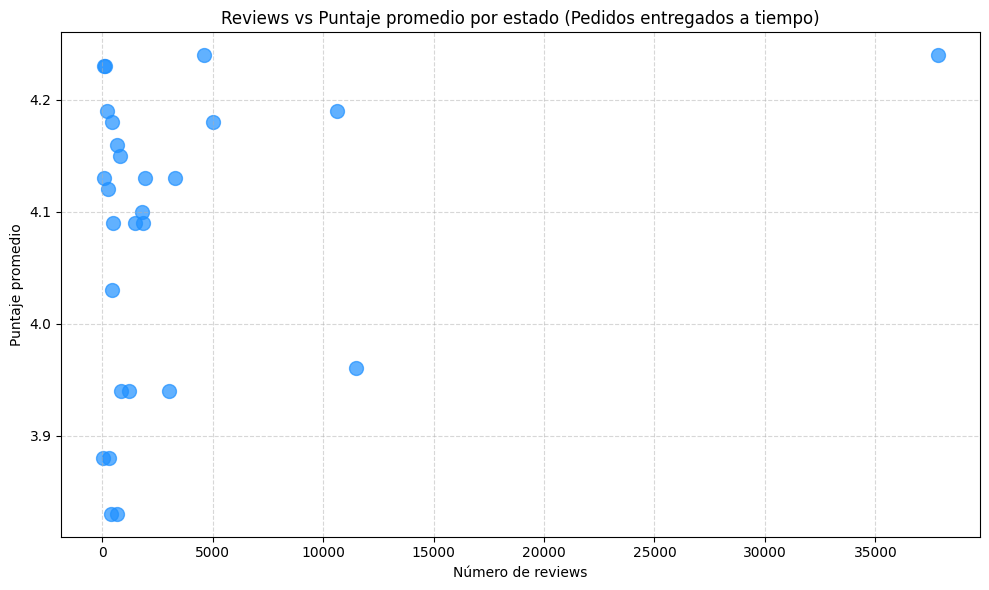

In [30]:


# Datos
x = customers_review['reviews']   # número de reviews
y = customers_review['score']     # puntaje promedio
states = customers_review['state']

plt.figure(figsize=(10,6))

# Scatter plot simple
plt.scatter(x, y, color='dodgerblue', s=100, alpha=0.7)



plt.title('Reviews vs Puntaje promedio por estado (Pedidos entregados a tiempo)')
plt.xlabel('Número de reviews')
plt.ylabel('Puntaje promedio')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



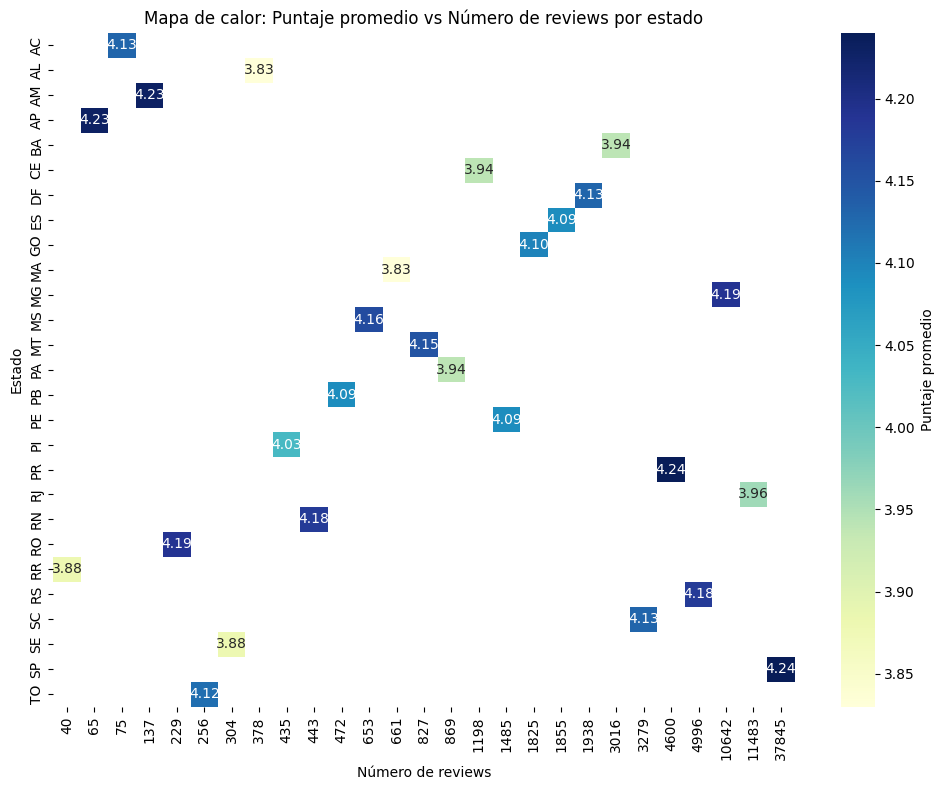

In [31]:


# Ordenamos por puntaje promedio para que el heatmap sea más intuitivo
customers_review_sorted = customers_review.sort_values('score', ascending=False)

plt.figure(figsize=(10,8))

# Creamos un heatmap usando pivot
heatmap_data = customers_review_sorted.pivot(index='state', columns='reviews', values='score')

sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Puntaje promedio'})

plt.title('Mapa de calor: Puntaje promedio vs Número de reviews por estado')
plt.xlabel('Número de reviews')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()


Mapa

In [32]:
import geobr
import geopandas as gpd

 

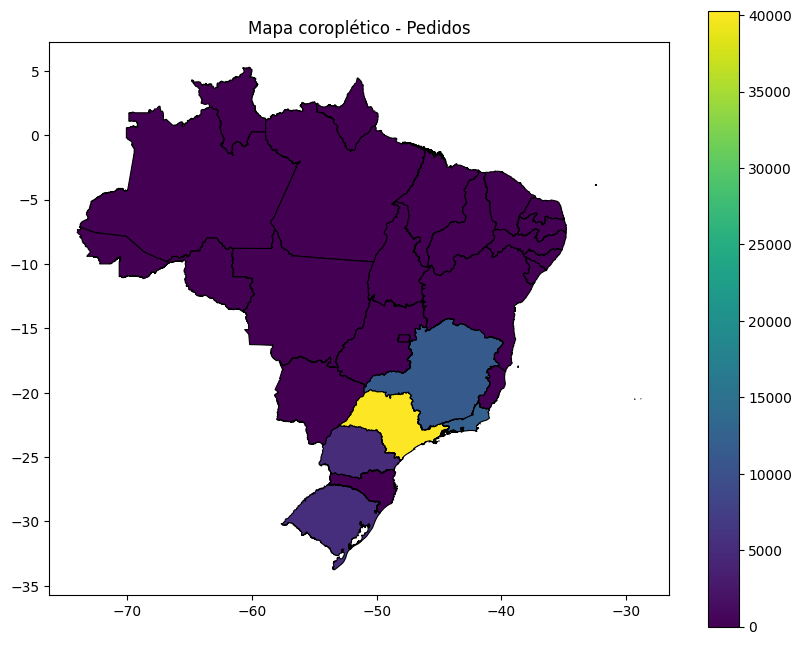

In [33]:
estados = gpd.read_file("br_states.geojson")

topEstadosMapa = topEstados.reset_index()  # Esto convierte el índice en columna


estados = estados.merge(topEstadosMapa[['state', 'id_user']], left_on='abbrev_state', right_on='state', how='left')
estados.rename(columns={'id_user': 'pedidos'},inplace=True)

estados['pedidos'] = estados['pedidos'].fillna(0)

estados.plot(
    column="pedidos",
    cmap="viridis",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    figsize=(10, 8)
)
 
plt.title("Mapa coroplético - Pedidos")
plt.show()